Q1: Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).
* Artificial Intelligence (AI): AI is the broadest field that focuses on creating machines or systems capable of performing tasks that usually require human intelligence, such as reasoning, decision-making, problem-solving, or natural language understanding. Example: Siri or Alexa.

* Machine Learning (ML): ML is a subset of AI where systems learn from data without being explicitly programmed. The model improves its performance with experience. Example: Email spam detection.

* Deep Learning (DL): DL is a specialized branch of ML that uses artificial neural networks with multiple layers to handle complex tasks like image recognition, speech recognition, or self-driving cars. Example: Face recognition in smartphones.

* Data Science (DS): DS is a broader discipline that involves extracting meaningful insights from data using statistics, ML, visualization, and domain knowledge. It combines AI/ML techniques with data handling and business problem-solving. Example: Customer churn prediction.

Q2: What are the types of machine learning? Describe each with one
real-world example.
* Supervised Learning: The model learns from labeled data (input-output pairs).

-Example: Predicting house prices based on features like size, location, and number of rooms.

* Unsupervised Learning: The model works on unlabeled data to find hidden structures or groupings.

-Example: Customer segmentation in e-commerce based on buying behavior.

* Reinforcement Learning: The model learns by interacting with an environment and receiving rewards/penalties.

-Example: A robot learning to walk or a self-driving car improving driving through feedback.

Q3: Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.
* Overfitting: The model learns both patterns and noise in the training data, performing well on training data but poorly on unseen data. Example: Memorizing answers without understanding.

* Underfitting: The model is too simple to capture the underlying trend in the data, leading to poor performance on both training and test data. Example: Using a straight line to predict a complex curve.

* Bias-Variance Tradeoff:
-Bias: Error from overly simplistic assumptions in the model.
-Variance: Error from being too sensitive to training data.

Tradeoff means balancing both—low bias and low variance—for good generalization.

Q4: What are outliers in a dataset, and list three common techniques for
handling them.
* Outliers: Extreme values that differ significantly from most of the data points. They may result from data entry errors, measurement errors, or genuine rare cases.

* Techniques to handle outliers:
-Removal: Drop rows containing extreme values if they are errors.
-Transformation: Apply log or square root transformations to reduce skewness.

Capping/Clipping: Replace outliers with percentile values (e.g., 1st and 99th percentile).

Q5: Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.

Process:
* Detect missing values.
* Analyze patterns (random or systematic).
* Choose an imputation method.
* Replace or estimate missing values accordingly.

-Numerical Data: Replace missing values with the mean or median of the column.

-Categorical Data: Replace missing values with the mode (most frequent value).

6: Write a Python program that:
* Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
* Prints the class distribution.

In [9]:
from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1],
                           n_samples=1000,
                           random_state=42,
                           shuffle=False)

print("Class distribution:", Counter(y))

Class distribution: Counter({np.int64(0): 897, np.int64(1): 103})


 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

In [2]:
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])

# One-hot encoding
encoded = pd.get_dummies(df, columns=['Color'])
print(encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


Q8: Write a Python script to:
* Generate 1000 samples from a normal distribution.
* Introduce 50 random missing values.
* Fill missing values with the column mean.
* Plot a histogram before and after imputation.

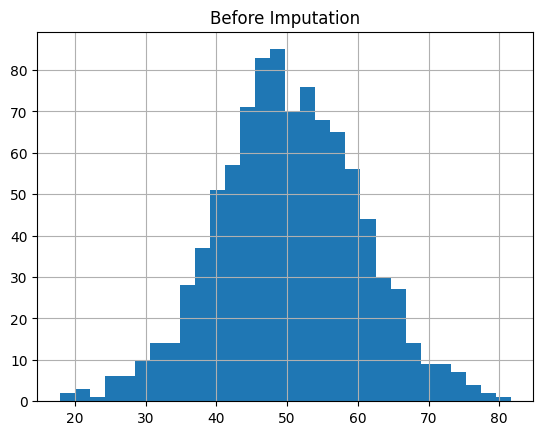

/tmp/ipython-input-3401355282.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Values'].fillna(df['Values'].mean(), inplace=True)


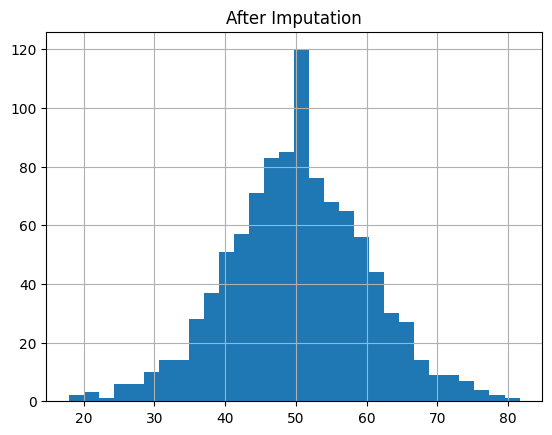

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 1000 samples
data = np.random.normal(loc=50, scale=10, size=1000)
df = pd.DataFrame(data, columns=['Values'])

# Introduce 50 missing values
missing_idx = np.random.choice(df.index, 50, replace=False)
df.loc[missing_idx, 'Values'] = np.nan

# Plot before imputation
df['Values'].hist(bins=30)
plt.title("Before Imputation")
plt.show()

# Fill missing with mean
df['Values'].fillna(df['Values'].mean(), inplace=True)

# Plot after imputation
df['Values'].hist(bins=30)
plt.title("After Imputation")
plt.show()

9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print("Scaled values:\n", scaled.flatten())

Scaled values:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


Q10: You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:

* Missing ages,
* Outliers in transaction amount,
* A highly imbalanced target (fraud vs. non-fraud),
* Categorical variables like payment method.

Explain the step-by-step data preparation plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding.

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Sample dataset (added more fraud cases)
data = {
    'Age': [25, np.nan, 40, 35, np.nan, 30, 28],
    'Transaction': [100, 5000, 200, 250, 10000, 300, 1500],
    'Payment': ['Card', 'Cash', 'Card', 'Wallet', 'Cash', 'Wallet', 'Card'],
    'Fraud': [0, 0, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Handle missing values
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Handle outliers (capping using IQR)
q1, q3 = df['Transaction'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
df['Transaction'] = np.clip(df['Transaction'], lower, upper)

# Encode categorical
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[['Payment']])
df = df.drop('Payment', axis=1)
df = pd.concat([df, pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Payment']))], axis=1)

# Balance classes (now works)
X = df.drop('Fraud', axis=1)
y = df['Fraud']
sm = SMOTE(random_state=42, k_neighbors=2)  # <- reduced neighbors for safety
X_res, y_res = sm.fit_resample(X, y)

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

print("Prepared Data Shape:", X_scaled.shape)
print("Balanced Target Distribution:\n", np.bincount(y_res))

Prepared Data Shape: (8, 4)
Balanced Target Distribution:
 [4 4]


1. Handle Missing Values

* For Age (numeric) → fill with median.

* For Payment Method (categorical) → fill with most frequent value.

2. Handle Outliers (Transaction Amount)

* Detect outliers using IQR method.

* Cap extreme values at upper and lower bounds.

3. Handle Imbalanced Target (Fraud vs Non-Fraud)

* Apply SMOTE (Synthetic Minority Oversampling) on training data to balance classes.

* Alternatively, use class weights.

4. Encode Categorical Variables

* Use One-Hot Encoding for “Payment Method”.

5. Scale Numerical Features

* Apply Min-Max Scaling (or Standardization) to bring values to a similar range.

6. Final Check

* Ensure the transformed dataset has no missing values, reduced outliers, balanced target, and properly encoded/scaled features.

* Now ready for model training.